In [116]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import style
%matplotlib widget
style.use('default')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Text(0, 0.5, 'y')

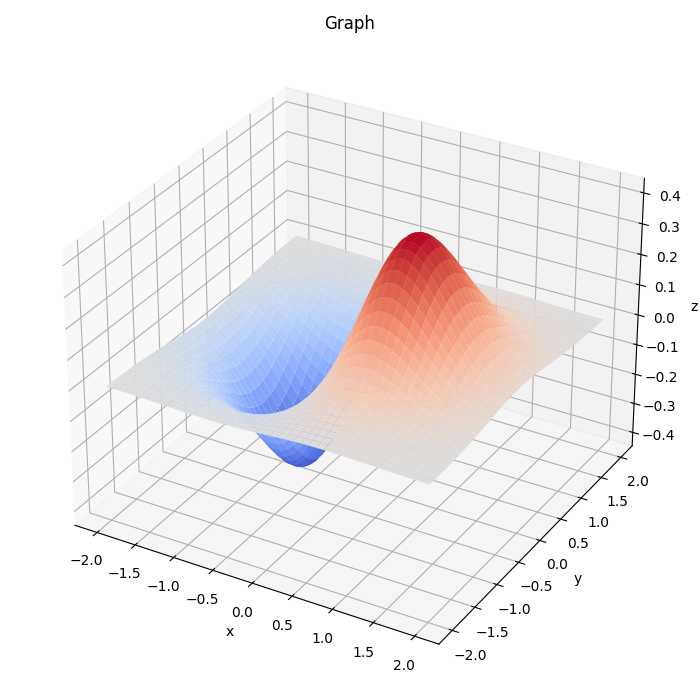

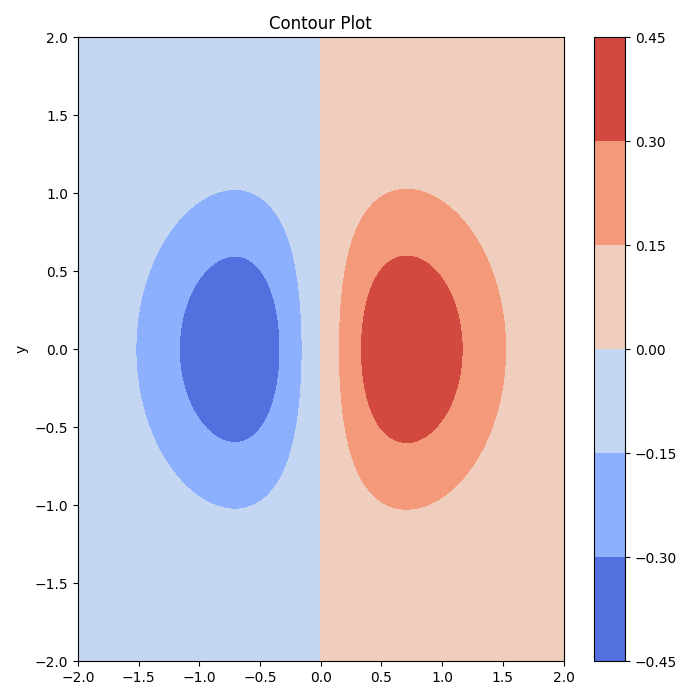

In [117]:
%matplotlib widget
def function_z(X,Y):
    return X * torch.e**(-(X**2)-(Y**2))

#def gradient_vector(x_1,x_2):
    

#Starts plot
N=256
arrange=[-2,2]

x_values=torch.linspace(arrange[0],arrange[1],steps=N)
y_values=torch.linspace(arrange[0],arrange[1],steps=N)

X, Y = torch.meshgrid(x_values,y_values)
Z = function_z(X,Y)

plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

#fig=plt.figure("Figure Juan")

ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Graph')

ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=10,antialiased=True)

#Contour plot
fig2,ax2=plt.subplots(1,1)
cp=ax2.contourf(X,Y,Z,cmap=cm.coolwarm)
#cp=ax2.contourf(X,Y,Z)
fig2.colorbar(cp)
ax2.set_title('Contour Plot')
ax2.set_ylabel('y')
#Test punto
#ax2.plot(-1, 0, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="yellow")


Para el punto 1.1

La función es no convexa según la página 3 del doc de Optmización.

Se debe buscar un punto óptimo local lo suficientemente satisfactorio.

Los puntos mínimos se pueden ver en entre -0.7,0.

Los puntos silla ?? no me parecen evidentes.

Para el punto 1.2 aplicar Vector gradiente con momentum



In [118]:
#Gradient Descent with momentum
from pickletools import read_uint1


def funct_z(X,Y):
    return X * torch.e**(-(X**2)-(Y**2))

def deriv_x(X, Y):
    return (1 - 2 * X**2) * torch.e ** (-(X**2)-(Y**2))

def deriv_y(X, Y):
    return -2 * X * Y * torch.e ** (-(X**2)-(Y**2))

def grad_descent_momentum(initial_pos,epochs,momentum,learning):
    #Starting position taken from parameters
    position=initial_pos
    x_t=[position]

    #v_t - 1 Corresponds to the previous velocity.
    v_t=0

    for i in range(epochs):
        gradient= torch.Tensor([deriv_x(position[0],position[1]),deriv_y(position[0],position[1])],)
        print("Gradient", i ,gradient.device)

        position = position - ((momentum * v_t) + learning * gradient)
        #print("Position", i ,position)

        x_t.append(position)

        #print("Posiciones", i ,x_t)

        v_t = momentum * v_t + learning * (1 - momentum) * gradient
        #print("Velocity ", i ,v_t)
        #print("******************New loop******************")
    
    
    return x_t

In [119]:
#Starts plot
def plot(points_x,points_y,points_z):

    %matplotlib widget


    #Starts plot
    N=256
    arrange=[-2,2]

    x_values=torch.linspace(arrange[0],arrange[1],steps=N)
    y_values=torch.linspace(arrange[0],arrange[1],steps=N)

    X, Y = torch.meshgrid(x_values,y_values)
    Z = funct_z(X,Y)

    plt.rcParams["figure.figsize"] = [7, 7]
    plt.rcParams["figure.autolayout"] = True

    #fig=plt.figure("Figure Juan")

    ax = plt.axes(projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Graph')

    ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=10,antialiased=True,alpha=0.5)
    ax.plot(points_x, points_y, points_z, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="yellow")

    #Contour plot
    fig2,ax2=plt.subplots(1,1)
    cp=ax2.contourf(X,Y,Z,cmap=cm.coolwarm)
    #cp=ax2.contourf(X,Y,Z)
    fig2.colorbar(cp)
    ax2.set_title('Contour Plot')
    ax2.set_ylabel('y')

    ax2.plot(points_x, points_y, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="yellow")
    ax2.quiver(points_x[:-1], points_y[:-1], (points_x[1:]-points_x[:-1]), (points_y[1:]-points_y[:-1]))


Gradient 0 cpu
Gradient 1 cpu
Gradient 2 cpu
Gradient 3 cpu
Gradient 4 cpu
Gradient 5 cpu
Gradient 6 cpu
Gradient 7 cpu
Gradient 8 cpu
Gradient 9 cpu
Points [tensor([ 0.5000, -0.2300]), tensor([ 0.4631, -0.2470]), tensor([ 0.4105, -0.2686]), tensor([ 0.3429, -0.2924]), tensor([ 0.2597, -0.3163]), tensor([ 0.1605, -0.3381]), tensor([ 0.0468, -0.3550]), tensor([-0.0770, -0.3639]), tensor([-0.2031, -0.3628]), tensor([-0.3218, -0.3511]), tensor([-0.4251, -0.3303])]


C:\Users\jcord\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mpl_toolkits\mplot3d\proj3d.py:140: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
C:\Users\jcord\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mpl_toolkits\mplot3d\proj3d.py:140: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differen

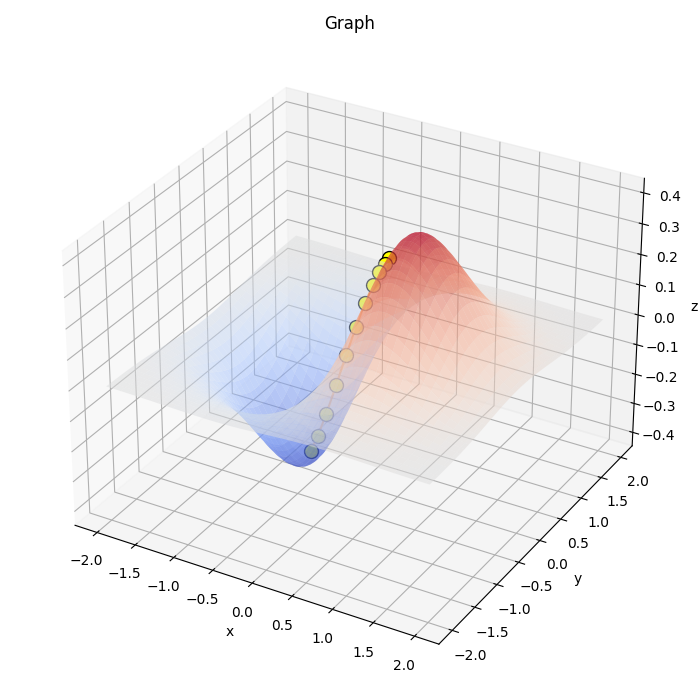

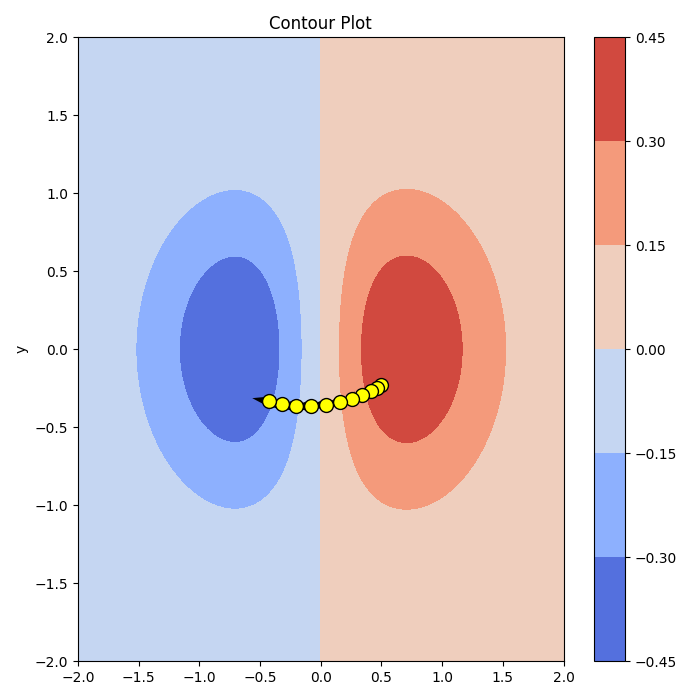

In [120]:
momentum=0.5
learning_rate=0.1
epochs=10


initial_pos=torch.Tensor([0.5, -0.23])
#initial_pos=torch.Tensor([1.0,0.0])
#initial_pos=torch.Tensor([0.7,0.6])
#initial_pos=torch.Tensor([0.4,-0.3])
#initial_pos=torch.Tensor([-0.5,-0.8])
points=grad_descent_momentum(initial_pos,epochs,momentum,learning_rate)
print("Points",points)

#Test punto
points=torch.stack(points)
points_x=points[:,0]
points_y=points[:,1]
points_z=funct_z(points_x,points_y)


#Plot
plot(points_x,points_y,points_z)